# Preprocessing

(**Note:** *As this notebook required downloading additional modules, it has been done in a separate virtual envoirnment named augumentation. To run this notebook, please run 'conda activate augumentation' in konsole beforehand.*)

## Average image size check

In [16]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
#This cell will save each image's size (both dimentions) into two lists. 
dim1 = []
dim2 = []
for image_filename in os.listdir('SortedBirdsImages/backup images/images/'):
    name, ext = os.path.splitext(image_filename)
    try:
        if ext == '.jpg':     # as we have only jpg files, we will be reading only these.
            img = imread('SortedBirdsImages/backup images/images/'+image_filename)
            d1,d2,color = img.shape
            dim1.append(d1)
            dim2.append(d2)
            
    except: 
        print(image_filename)
        continue

In [4]:
Dim=pd.DataFrame([],columns=['dim1','dim2']) # create a pandas data frame to store these dimentions.
Dim.dim1=dim1
Dim.dim2=dim2

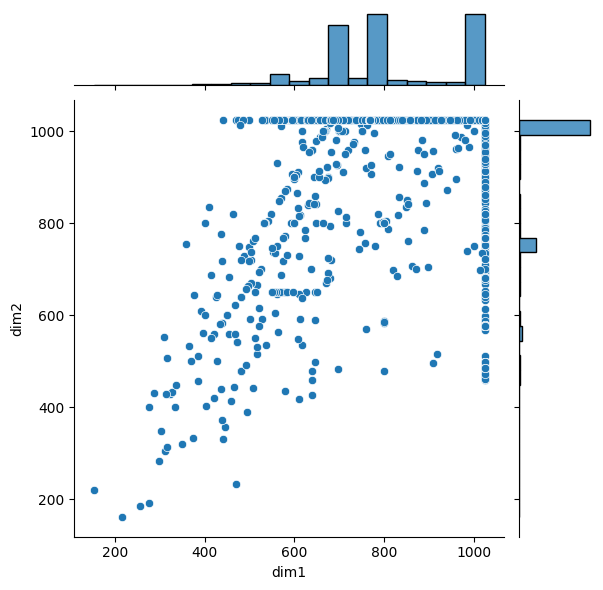

In [5]:
sns.jointplot(data=Dim, x="dim1", y="dim2")    #Plot the dimetions to have a visualization.

In [6]:
print('Dimentions stats:\n')
print('Mean Dimentions(',int(np.mean(dim1)),',',int(np.mean(dim2)),')')   #mean dimentions
print('Min Dimentions: (', np.min(dim1),',',np.min(dim2),')')             #min dimentions
print('Max Dimentions: (', np.max(dim1),',',np.max(dim2),')')             #max dimentions

Dimentions stats:

Mean Dimentions( 801 , 931 )
Min Dimentions: ( 153 , 162 )
Max Dimentions: ( 1024 , 1024 )


As we can see from the plot, most of the images have atleast on dimention as 1024, we should choose an architecture that support 1024x1024 sized images. Some good options are Faster RCNN ResNet 101 1024x1024 and SSD ReaNet 101 1024x1024. We can also change the remaining images by resizing them to this dimention, but that is not necessary at this stage, as these architectures are capable of doing this on their own.

## Labelling

For object detection using Tensorflow Object Detection API, we need to create labels for all the four types of birds and annotae the images. The labels will be stored in the form of XML files in Pascal VOC format. The key features of the XML files are the object name, image size (height, width, depth) and bounding box dimentions.These features will be used to create TF records in the training notebook.

There are a lot of modules available online to tag our images. The one used in this task is called LabelImg, recommended by the official tutorial of Object Detection API. It is an easy to use module and creates relatively clean XML files. The following command runs the executable file which allows to label the images.

In [13]:
!python labelImg/labelImg.py        #Runs the LabelImg module

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-msc1'


The XML file looks like this;

##### < annotation>
##### < folder>Erithacus_Rubecula< /folder>
##### < filename>ErithacusRubecula0004.jpg < /filename>
##### < path>images/ErithacusRubecula0004.jpg< /path>
##### < source>
##### < database>Unknown< /database>
##### < /source>
##### < size>
##### < width>1024< /width>
##### < height>1024< /height>
##### < depth>3< /depth>
##### < /size>
##### < segmented>0< /segmented>
##### < object>
##### < name>Erithacus_Rubecula< /name>
##### < pose>Unspecified< /pose>
##### < truncated>1< /truncated>
##### < difficult>0< /difficult>
##### < bndbox>
##### < xmin>257< /xmin>
##### < ymin>258< /ymin>
##### < xmax>1024< /xmax>
##### < ymax>1024< /ymax>
##### < /bndbox>
##### < /object>
##### < /annotation>

#### Imbalance

While labeling the images, the  images that were not related or were not of good quality were deleted as these would only lower the performance of the model during training. Another thing that is noticeable is the imbalance in the dataset. This is beacuse most of the images have different number of birds in them. Some have one bird, while a lot have multiple birds, which creates imbalance in the data. To visualize this imbalance, the following script is written, which load each XML file and counts the objects (birds) in them and returns the number of birds in dataset for each class and a graphical represntation of this information.

Total number of Erithacus Rubecula bounding boxes in  968 images are........ 970
Total number of Periparus Ater bounding boxes in  947 images are............ 958
Total number of Pica Pica bounding boxes in  944 images are................. 1043
Total number of Turdus Merula bounding boxes in  918 images are............. 942


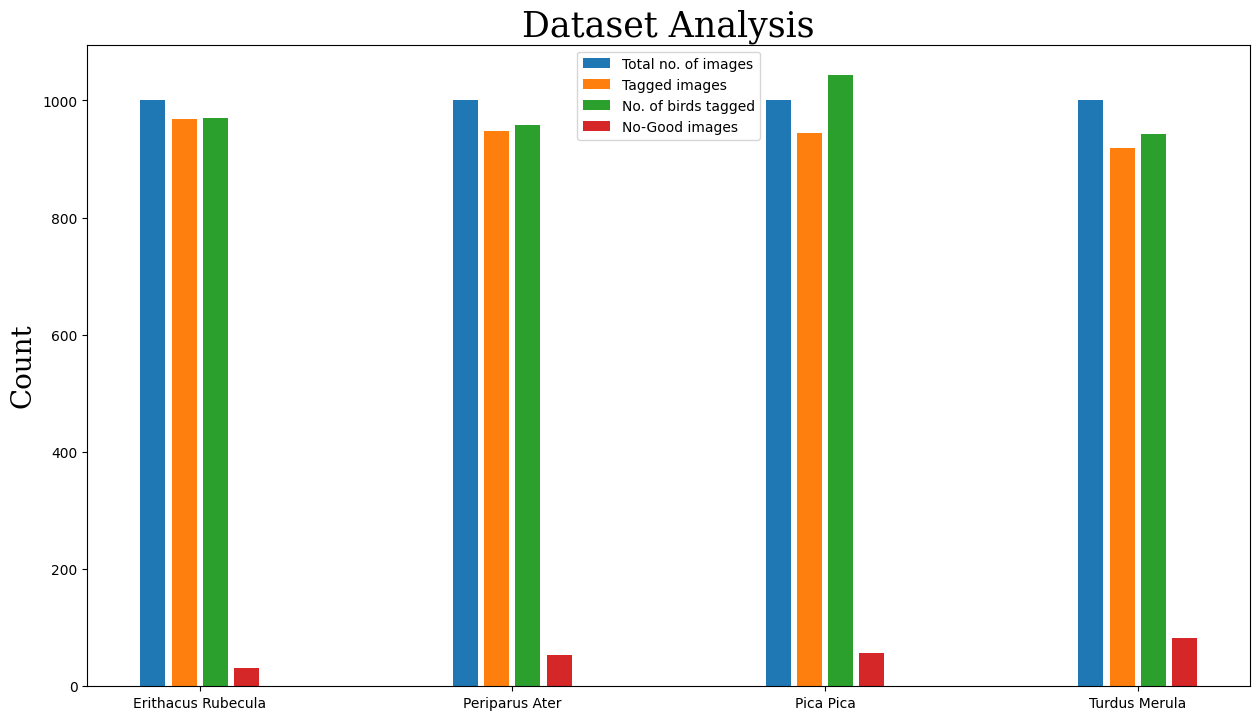

In [22]:
#Import important libraries
import os
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt
import numpy as np

#Paths to folders containing the XML files.
PP_path = 'SortedBirdsImages/backup images/xml_files/PP_XML/'
TM_path = 'SortedBirdsImages/backup images/xml_files/TM_XML/'
PA_path = 'SortedBirdsImages/backup images/xml_files/PA_XML/'
ER_path = 'SortedBirdsImages/backup images/xml_files/ER_XML/'
        
#Total images for each class were 1000.
Total_images=[1000,1000,1000,1000]

#Counting the number of tagged files.
count = 0
for path in os.scandir(ER_path):
    if path.is_file():
        count += 1
ER_files=count

count = 0
for path in os.scandir(PA_path):
    if path.is_file():
        count += 1
PA_files=count

count = 0
for path in os.scandir(PP_path):
    if path.is_file():
        count += 1
PP_files=count

count = 0
for path in os.scandir(TM_path):
    if path.is_file():
        count += 1
TM_files=count

Tagged_images=[ER_files,PA_files,PP_files,TM_files]

#Counting number of birds in all images for each class
paths_PP=os.listdir(PP_path)
paths_PA=os.listdir(PA_path)
paths_ER=os.listdir(ER_path)
paths_TM=os.listdir(TM_path)

bboxes_ER=[]
bboxes_PA=[]
bboxes_PP=[]
bboxes_TM=[]

for path in paths_ER:
    pth=os.path.join(ER_path,path)
    tree = ET.parse(pth)
    root=tree.getroot()
    objects=root.findall('object')
    a=len(objects)
    bboxes_ER.append(a)

for path in paths_PA:
    pth=os.path.join(PA_path,path)
    tree = ET.parse(pth)
    root=tree.getroot()
    objects=root.findall('object')
    a=len(objects)
    bboxes_PA.append(a)

for path in paths_PP:
    pth=os.path.join(PP_path,path)
    tree = ET.parse(pth)
    root=tree.getroot()
    objects=root.findall('object')
    a=len(objects)
    bboxes_PP.append(a)
    
for path in paths_TM:
    pth=os.path.join(TM_path,path)
    tree = ET.parse(pth)
    root=tree.getroot()
    objects=root.findall('object')
    a=len(objects)
    bboxes_TM.append(a)
    
#Sum to get a total of each bird    
ER_bbox=sum(bboxes_ER)
PA_bbox=sum(bboxes_PA)
PP_bbox=sum(bboxes_PP)
TM_bbox=sum(bboxes_TM)

print('Total number of Erithacus Rubecula bounding boxes in ',len(paths_ER),'images are........',ER_bbox)
print('Total number of Periparus Ater bounding boxes in ',len(paths_PA),'images are............',PA_bbox)
print('Total number of Pica Pica bounding boxes in ',len(paths_PP),'images are.................',PP_bbox)
print('Total number of Turdus Merula bounding boxes in ',len(paths_TM),'images are.............',TM_bbox)
    
bird_count=[ER_bbox,PA_bbox,PP_bbox,TM_bbox]    
    
no_good=[1000-ER_files,1000-PA_files,1000-PP_files,1000-TM_files]
    
#Plotting
labels = ['Erithacus Rubecula', 'Periparus Ater', 'Pica Pica', 'Turdus Merula']

x = np.arange(len(labels))  # the label locations
width =0.08
# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.15, Total_images, width, label='Total no. of images')
rects2 = ax.bar(x - 0.05, Tagged_images, width, label='Tagged images')
rects3 = ax.bar(x + 0.05, bird_count, width, label='No. of birds tagged')
rects4 = ax.bar(x + 0.15, no_good, width, label='No-Good images')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count',fontsize = 20,font='serif')
ax.set_title('Dataset Analysis',fontsize = 25,font='serif')
ax.set_xticks(x, labels)
ax.legend(loc='upper center')
fig.set_size_inches(18*5/6, 10*5/6)

plt.show()
    

## Dataset Balancing:

As we know, the number of birds in the dataset are not equal. The table below shows the imbalance in the dataset.
                                                
____________________________________________________________________________________________________________________

                                              Birds in Dataset
____________________________________________________________________________________________________________________
                                                  
                                                  Classes
____________________________________________________________________________________________________________________

                    Erithacus Rubecula      Periparus Ater      Pica Pica      Turdus Merula
____________________________________________________________________________________________________________________

    No. of Birds           970                    958              1043             942

    Images to be           73                      85                0              101         Total: 259
       added

To solve this, random images are selected from each bird class along with its XML file and copied to a new folder (to_blur). Python script below is used to extract bounding box info from XML files to CSV files. After this two new functions are defined to create pandas dataframe from the bounding box info from CSV file created and the images are blured. After this, a third script is run to create XML files for these new blured images. This way, the dataset was balanced and also annotated at the same time. After creating the XML, both the images and XML are copied to the combined images folder

###### Import important libraries:

In [1]:
import cv2 as cv
from PIL import Image
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import os
import imageio
import re
import pandas as pd
import numpy as np
from collections import defaultdict
import csv
from xml.etree.ElementTree import parse, Element, SubElement, ElementTree
import xml.etree.ElementTree as ET
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###### Python scrit to convert XML files to CSV files:

In [2]:
!python xml_to_csv_Blur.py

/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/ErithacusRubecula0060.xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/Turdus_merula _ 21 .xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/Turdus_merula _ 31 .xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/Periparus_ater _ 37 .xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/Periparus_ater _ 65 .xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/ErithacusRubecula0029.xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/Periparus_ater _ 11 .xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsImages/images/to_blur/Turdus_merula _ 118 .xml
/home/msc1/Desktop/TensorFlow/workspace/training/SortedBirdsIm

###### Define a function to convert BoundingBoxesOnImage object into DataFrame:

In [3]:
#   function to convert BoundingBoxesOnImage object into DataFrame

def bbs_obj_to_df(bbs_object):
    #     convert BoundingBoxesOnImage object into array
    bbs_array = bbs_object.to_xyxy_array()
    #   convert array into a DataFrame ['xmin', 'ymin', 'xmax', 'ymax'] columns
    df_bbs = pd.DataFrame(bbs_array, columns=['xmin', 'ymin', 'xmax', 'ymax'])
    return df_bbs

###### Define a function to apply agumentation to images:

In [4]:
def image_aug(df, images_path, aug_images_path, image_prefix, augmentor):
    # create data frame which we're going to populate with augmented image info
    aug_bbs_xy = pd.DataFrame(columns=
                              ['filename','width','height','label', 'xmin', 'ymin', 'xmax', 'ymax']
                             )
    grouped = df.groupby('filename')
    
    for filename in df['filename'].unique():
    #   get separate data frame grouped by file name
        group_df = grouped.get_group(filename)
        group_df = group_df.reset_index()
        group_df = group_df.drop(['index'], axis=1)   
    #   read the image
        image = imageio.imread(images_path+filename)
    #   get bounding boxes coordinates and write into array        
        bb_array = group_df.drop(['filename', 'width', 'height', 'label'], axis=1).values
    #   pass the array of bounding boxes coordinates to the imgaug library
        bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
    #   apply augmentation on image and on the bounding boxes
        image_aug, bbs_aug = augmentor(image=image, bounding_boxes=bbs)
        image_aug = cv.cvtColor(image_aug, cv.COLOR_BGR2RGB)
    #   disregard bounding boxes which have fallen out of image pane    
        bbs_aug = bbs_aug.remove_out_of_image()
    #   clip bounding boxes which are partially outside of image pane
        bbs_aug = bbs_aug.clip_out_of_image()
        
    #   don't perform any actions with the image if there are no bounding boxes left in it    
        if re.findall('Image...', str(bbs_aug)) == ['Image([]']:
            pass
        
    #   otherwise continue
        else:
        #   write augmented image to a file
            cv.imwrite(aug_images_path+image_prefix+filename, image_aug)  
        #   create a data frame with augmented values of image width and height
            info_df = group_df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1)    
            for index, _ in info_df.iterrows():
                info_df.at[index, 'width'] = image_aug.shape[1]
                info_df.at[index, 'height'] = image_aug.shape[0]
        #   rename filenames by adding the predifined prefix
            info_df['filename'] = info_df['filename'].apply(lambda x: image_prefix+x)
        #   create a data frame with augmented bounding boxes coordinates using the function we created earlier
            bbs_df = bbs_obj_to_df(bbs_aug)
        #   concat all new augmented info into new data frame
            aug_df = pd.concat([info_df, bbs_df], axis=1)
        #   append rows to aug_bbs_xy data frame
            aug_bbs_xy = pd.concat([aug_bbs_xy, aug_df])            
    
    # return dataframe with updated images and bounding boxes annotations 
    aug_bbs_xy = aug_bbs_xy.reset_index()
    aug_bbs_xy = aug_bbs_xy.drop(['index'], axis=1)
    return aug_bbs_xy

In [5]:
#    Read the CSV file created above to perform agumentation
df = pd.read_csv('SortedBirdsImages/CSV/labels_blur.csv')
df

,filename,width,height,label,xmin,ymin,xmax,ymax
0,ErithacusRubecula0060.jpg,1024,678,Erithacus_Rubecula,559,244,698,431
1,Turdus_merula _ 21 .jpg,949,1024,Turdus_merula,242,302,782,769
2,Turdus_merula _ 31 .jpg,498,1024,Turdus_merula,263,475,316,497
3,Periparus_ater _ 37 .jpg,591,1024,Periparus_ater,193,531,356,644
4,Periparus_ater _ 65 .jpg,1000,616,Periparus_ater,234,228,465,460
...,...,...,...,...,...,...,...,...
259,Turdus_merula _ 61 .jpg,1024,1021,Turdus_merula,433,82,602,171
260,ErithacusRubecula0088.jpg,473,1024,Erithacus_Rubecula,230,352,267,400
261,Turdus_merula _ 56 .jpg,1024,1024,Turdus_merula,401,131,868,920
262,Periparus_ater _ 56 .jpg,1024,1024,Periparus_ater,301,371,797,822


In [6]:
#   Creating a Blur image agumentor
blr = iaa.GaussianBlur(2)      # value is kept 2 to give a moderate blur.
#   Applying the blur agumentor
blur_images_df = image_aug(df, 'SortedBirdsImages/images/to_blur/', 'SortedBirdsImages/images/blur/', 'blr_', blr)
blur_images_df = blur_images_df.astype({'xmin': 'int', 'ymin': 'int','xmax': 'int', 'ymax': 'int'})
#   Convert into a CSV file to create an XML BoundingBox Label file 
blur_images_df.to_csv('SortedBirdsImages/images/blur/labels.csv',index= False)

##### Script to convert CSV file for blur images to XML files:

In [7]:
save_root2 = "SortedBirdsImages/images/blur"

if not os.path.exists(save_root2):
    os.mkdir(save_root2)


def write_xml(folder, filename, bbox_list):
    root = Element('annotation')
    SubElement(root, 'folder').text = folder
    SubElement(root, 'filename').text = filename
    SubElement(root, 'path').text = './images' +  filename
    source = SubElement(root, 'source')
    SubElement(source, 'database').text = 'Unknown'



    # Details from first entry
    e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = bbox_list[0]
    
    size = SubElement(root, 'size')
    SubElement(size, 'width').text = e_width
    SubElement(size, 'height').text = e_height
    SubElement(size, 'depth').text = '3'

    SubElement(root, 'segmented').text = '0'

    for entry in bbox_list:
        e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = entry
   
    
        obj = SubElement(root, 'object')
        SubElement(obj, 'name').text = e_class_name
        SubElement(obj, 'pose').text = 'Unspecified'
        SubElement(obj, 'truncated').text = '0'
        SubElement(obj, 'difficult').text = '0'

        bbox = SubElement(obj, 'bndbox')
        SubElement(bbox, 'xmin').text = e_xmin
        SubElement(bbox, 'ymin').text = e_ymin
        SubElement(bbox, 'xmax').text = e_xmax
        SubElement(bbox, 'ymax').text = e_ymax

    #indent(root)
    tree = ElementTree(root)
    
    xml_filename = os.path.join('.', folder, os.path.splitext(filename)[0] + '.xml')
    tree.write(xml_filename)
    

entries_by_filename = defaultdict(list)

with open('images/blur/labels.csv', 'r', encoding='utf-8') as f_input_csv:
    csv_input = csv.reader(f_input_csv)
    header = next(csv_input)

    for row in csv_input:
        filename, width, height, class_name, xmin, ymin, xmax, ymax = row

        
        entries_by_filename[filename].append(row)
sum=0
for filename, entries in entries_by_filename.items():
    print(filename, len(entries))
    sum=sum+len(entries)
    write_xml(save_root2, filename, entries)

blr_ErithacusRubecula0060.jpg 1
blr_Turdus_merula _ 21 .jpg 1
blr_Turdus_merula _ 31 .jpg 1
blr_Periparus_ater _ 37 .jpg 1
blr_Periparus_ater _ 65 .jpg 1
blr_ErithacusRubecula0029.jpg 1
blr_Periparus_ater _ 11 .jpg 1
blr_Turdus_merula _ 118 .jpg 1
blr_Turdus_merula _ 49 .jpg 1
blr_ErithacusRubecula0013.jpg 1
blr_Periparus_ater _ 29 .jpg 1
blr_Turdus_merula _ 55 .jpg 1
blr_ErithacusRubecula0032.jpg 1
blr_ErithacusRubecula0082.jpg 1
blr_ErithacusRubecula0022.jpg 1
blr_Turdus_merula _ 36 .jpg 1
blr_Turdus_merula _ 126 .jpg 1
blr_ErithacusRubecula0075.jpg 1
blr_Turdus_merula _ 109 .jpg 1
blr_Turdus_merula _ 42 .jpg 1
blr_ErithacusRubecula0067.jpg 1
blr_ErithacusRubecula0007.jpg 1
blr_ErithacusRubecula0010.jpg 1
blr_Turdus_merula _ 108 .jpg 1
blr_ErithacusRubecula0073.jpg 1
blr_Periparus_ater _ 43 .jpg 1
blr_Periparus_ater _ 78 .jpg 1
blr_Periparus_ater _ 38 .jpg 1
blr_ErithacusRubecula0085.jpg 1
blr_ErithacusRubecula0074.jpg 1
blr_Periparus_ater _ 58 .jpg 1
blr_ErithacusRubecula0009.jpg 1


In [8]:
#    print the total new birds added to data set:
print('No of birds in blured images:', sum)

No of birds in blured images: 264


## Image Agumentation:

For image agmentation, we can rotate each image at 90, 180, and 270 degrees angles to create more images. Moreover, we can flip the image and then rotate it again on the above angles too. This way each image generates 7 more images that are unique and will increase the dataset which will help our model to learn better. Although we can rotae the image at any angle but doing this will change the bounding box's fundamental area. The ImgAug can agument the coordinates of the boxes but the area has to remain same. If rotated at any other angle, the bounding box will start to include too much of the back ground and out model will start considering these as the foreground object.

But before that we will run the below script to get all the xml files in CSV format. This is the same file as above with a minor adjustment to to the directories containing the images.

In [21]:
 !python xml_to_csv_Aug.py

/home/msc1/Desktop/SortedBirdsImages/images/images/
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 962 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 687 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 21 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 814 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 673 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 188 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 937 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 722 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 31 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 526 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 642 .xml
/home/msc1/Desktop/SortedBirdsImages/images/images/Turdus_merula _ 847 .xml
/home/msc1/Desktop/SortedBirdsImages/i

In [22]:
#   Rotation at 90,180, and 270 degree
aug1=iaa.Affine(rotate=90)
aug2=iaa.Affine(rotate=180)
aug3=iaa.Affine(rotate=270)

#   Fliped vertically
aug4=iaa.VerticalFlip()
#   Flip and rotate
aug5=iaa.Sequential([iaa.VerticalFlip()
                     ,iaa.Affine(rotate=90)])
aug6=iaa.Sequential([iaa.VerticalFlip()
                     ,iaa.Affine(rotate=180)])
aug7=iaa.Sequential([iaa.VerticalFlip()
                     ,iaa.Affine(rotate=270)])

In [23]:
#    Read the CSV file created above to perform agumentation
Aug_df = pd.read_csv('SortedBirdsImages/CSV/labels_dataset.csv')

###### Applying agumentation:

In [24]:
augmented_images_df1 = image_aug(Aug_df, 'SortedBirdsImages/images/images/', 'SortedBirdsImages/Augumented/', 'aug1_', aug1)
augmented_images_df2 = image_aug(Aug_df, 'SortedBirdsImages/images/images/', 'SortedBirdsImages/Augumented/', 'aug2_', aug2)
augmented_images_df3 = image_aug(Aug_df, 'SortedBirdsImages/images/images/', 'SortedBirdsImages/Augumented/', 'aug3_', aug3)
augmented_images_df4 = image_aug(Aug_df, 'SortedBirdsImages/images/images/', 'SortedBirdsImages/Augumented/', 'aug4_', aug4)
augmented_images_df5 = image_aug(Aug_df, 'SortedBirdsImages/images/images/', 'SortedBirdsImages/Augumented/', 'aug5_', aug5)
augmented_images_df6 = image_aug(Aug_df, 'SortedBirdsImages/images/images/', 'SortedBirdsImages/Augumented/', 'aug6_', aug6)
augmented_images_df7 = image_aug(Aug_df, 'SortedBirdsImages/images/images/', 'SortedBirdsImages/Augumented/', 'aug7_', aug7)

In [25]:
all_labels_df = pd.concat([augmented_images_df1,augmented_images_df2,
                           augmented_images_df3,augmented_images_df4,
                           augmented_images_df5,augmented_images_df6,
                           augmented_images_df7,])

In [26]:
all_labels_df= all_labels_df.dropna(axis=0) #drop the NA values for the boxes that go out of image
#change the float type coordinates into int
all_labels_df= all_labels_df.astype({'xmin': 'int', 'ymin': 'int','xmax': 'int', 'ymax': 'int'})
all_labels_df

,filename,width,height,label,xmin,ymin,xmax,ymax
0,aug1_Turdus_merula _ 962 .jpg,1024,768,Turdus_merula,364,350,483,480
1,aug1_Turdus_merula _ 687 .jpg,1024,768,Turdus_merula,207,298,791,514
2,aug1_Turdus_merula _ 21 .jpg,949,1024,Turdus_merula,217,279,684,819
3,aug1_Turdus_merula _ 814 .jpg,768,1024,Turdus_merula,366,466,419,613
4,aug1_Turdus_merula _ 673 .jpg,1024,768,Turdus_merula,195,393,690,605
...,...,...,...,...,...,...,...,...
936,aug7_Turdus_merula _ 849 .jpg,1024,683,Turdus_merula,311,156,597,683
937,aug7_Turdus_merula _ 1207 .jpg,1024,768,Turdus_merula,183,16,865,526
938,aug7_Turdus_merula _ 230 .jpg,1024,768,Turdus_merula,354,111,579,528
939,aug7_Turdus_merula _ 611 .jpg,768,1024,Turdus_merula,268,530,376,687


In [27]:
all_labels_df.to_csv('SortedBirdsImages/Augumented/csv/labels.csv',index= False)  #Save as a CSV file

In [28]:
save_root2 = "SortedBirdsImages/Augumented"

if not os.path.exists(save_root2):
    os.mkdir(save_root2)


def write_xml(folder, filename, bbox_list):
    root = Element('annotation')
    SubElement(root, 'folder').text = folder
    SubElement(root, 'filename').text = filename
    SubElement(root, 'path').text = './images' +  filename
    source = SubElement(root, 'source')
    SubElement(source, 'database').text = 'Unknown'



    # Details from first entry
    e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = bbox_list[0]
    
    size = SubElement(root, 'size')
    SubElement(size, 'width').text = e_width
    SubElement(size, 'height').text = e_height
    SubElement(size, 'depth').text = '3'

    SubElement(root, 'segmented').text = '0'

    for entry in bbox_list:
        e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax = entry
   
    
        obj = SubElement(root, 'object')
        SubElement(obj, 'name').text = e_class_name
        SubElement(obj, 'pose').text = 'Unspecified'
        SubElement(obj, 'truncated').text = '0'
        SubElement(obj, 'difficult').text = '0'

        bbox = SubElement(obj, 'bndbox')
        SubElement(bbox, 'xmin').text = e_xmin
        SubElement(bbox, 'ymin').text = e_ymin
        SubElement(bbox, 'xmax').text = e_xmax
        SubElement(bbox, 'ymax').text = e_ymax

    #indent(root)
    tree = ElementTree(root)
    
    xml_filename = os.path.join('.', folder, os.path.splitext(filename)[0] + '.xml')
    tree.write(xml_filename)
    

entries_by_filename = defaultdict(list)

with open('SortedBirdsImages/Augumented/csv/labels.csv', 'r', encoding='utf-8') as f_input_csv:
    csv_input = csv.reader(f_input_csv)
    header = next(csv_input)

    for row in csv_input:
        filename, width, height, class_name, xmin, ymin, xmax, ymax = row

        #if class_name == "Car":
        entries_by_filename[filename].append(row)

for filename, entries in entries_by_filename.items():
    print(filename, len(entries))
    write_xml(save_root2, filename, entries)

aug1_Turdus_merula _ 962 .jpg 1
aug1_Turdus_merula _ 687 .jpg 1
aug1_Turdus_merula _ 21 .jpg 1
aug1_Turdus_merula _ 814 .jpg 1
aug1_Turdus_merula _ 673 .jpg 1
aug1_Turdus_merula _ 188 .jpg 1
aug1_Turdus_merula _ 937 .jpg 1
aug1_Turdus_merula _ 722 .jpg 1
aug1_Turdus_merula _ 31 .jpg 1
aug1_Turdus_merula _ 526 .jpg 1
aug1_Turdus_merula _ 642 .jpg 1
aug1_Turdus_merula _ 847 .jpg 1
aug1_Turdus_merula _ 732 .jpg 1
aug1_Turdus_merula _ 415 .jpg 1
aug1_Turdus_merula _ 661 .jpg 1
aug1_Turdus_merula _ 515 .jpg 1
aug1_Turdus_merula _ 684 .jpg 1
aug1_Turdus_merula _ 498 .jpg 1
aug1_Turdus_merula _ 481 .jpg 1
aug1_Turdus_merula _ 950 .jpg 1
aug1_Turdus_merula _ 1023 .jpg 1
aug1_Turdus_merula _ 485 .jpg 1
aug1_Turdus_merula _ 432 .jpg 1
aug1_Turdus_merula _ 625 .jpg 1
aug1_Turdus_merula _ 118 .jpg 1
aug1_Turdus_merula _ 570 .jpg 1
aug1_Turdus_merula _ 639 .jpg 1
aug1_Turdus_merula _ 274 .jpg 1
aug1_Turdus_merula _ 49 .jpg 1
aug1_Turdus_merula _ 737 .jpg 1
aug1_Turdus_merula _ 1135 .jpg 1
aug1_Turd

aug3_Turdus_merula _ 418 .jpg 1
aug3_Turdus_merula _ 676 .jpg 1
aug3_Turdus_merula _ 1083 .jpg 1
aug3_Turdus_merula _ 783 .jpg 1
aug3_Turdus_merula _ 430 .jpg 1
aug3_Turdus_merula _ 770 .jpg 1
aug3_Turdus_merula _ 1123 .jpg 1
aug3_Turdus_merula _ 949 .jpg 1
aug3_Turdus_merula _ 59 .jpg 1
aug3_Turdus_merula _ 160 .jpg 1
aug3_Turdus_merula _ 117 .jpg 1
aug3_Turdus_merula _ 361 .jpg 1
aug3_Turdus_merula _ 855 .jpg 1
aug3_Turdus_merula _ 1160 .jpg 1
aug3_Turdus_merula _ 308 .jpg 1
aug3_Turdus_merula _ 216 .jpg 1
aug3_Turdus_merula _ 100 .jpg 1
aug3_Turdus_merula _ 406 .jpg 1
aug3_Turdus_merula _ 123 .jpg 1
aug3_Turdus_merula _ 245 .jpg 1
aug3_Turdus_merula _ 548 .jpg 1
aug3_Turdus_merula _ 562 .jpg 1
aug3_Turdus_merula _ 425 .jpg 1
aug3_Turdus_merula _ 850 .jpg 1
aug3_Turdus_merula _ 462 .jpg 1
aug3_Turdus_merula _ 680 .jpg 1
aug3_Turdus_merula _ 1007 .jpg 1
aug3_Turdus_merula _ 1154 .jpg 1
aug3_Turdus_merula _ 568 .jpg 1
aug3_Turdus_merula _ 292 .jpg 1
aug3_Turdus_merula _ 172 .jpg 1
aug3

aug5_Turdus_merula _ 727 .jpg 1
aug5_Turdus_merula _ 708 .jpg 1
aug5_Turdus_merula _ 1195 .jpg 1
aug5_Turdus_merula _ 967 .jpg 1
aug5_Turdus_merula _ 74 .jpg 1
aug5_Turdus_merula _ 394 .jpg 1
aug5_Turdus_merula _ 804 .jpg 1
aug5_Turdus_merula _ 267 .jpg 1
aug5_Turdus_merula _ 601 .jpg 1
aug5_Turdus_merula _ 40 .jpg 1
aug5_Turdus_merula _ 735 .jpg 1
aug5_Turdus_merula _ 64 .jpg 1
aug5_Turdus_merula _ 76 .jpg 1
aug5_Turdus_merula _ 993 .jpg 1
aug5_Turdus_merula _ 440 .jpg 1
aug5_Turdus_merula _ 522 .jpg 1
aug5_Turdus_merula _ 1121 .jpg 1
aug5_Turdus_merula _ 330 .jpg 1
aug5_Turdus_merula _ 948 .jpg 1
aug5_Turdus_merula _ 551 .jpg 1
aug5_Turdus_merula _ 914 .jpg 1
aug5_Turdus_merula _ 91 .jpg 1
aug5_Turdus_merula _ 70 .jpg 1
aug5_Turdus_merula _ 726 .jpg 1
aug5_Turdus_merula _ 1104 .jpg 1
aug5_Turdus_merula _ 541 .jpg 1
aug5_Turdus_merula _ 778 .jpg 1
aug5_Turdus_merula _ 1096 .jpg 1
aug5_Turdus_merula _ 1035 .jpg 1
aug5_Turdus_merula _ 35 .jpg 1
aug5_Turdus_merula _ 420 .jpg 1
aug5_Turdu

aug7_Turdus_merula _ 1069 .jpg 1
aug7_Turdus_merula _ 1075 .jpg 2
aug7_Turdus_merula _ 87 .jpg 1
aug7_Turdus_merula _ 1006 .jpg 1
aug7_Turdus_merula _ 761 .jpg 1
aug7_Turdus_merula _ 1188 .jpg 1
aug7_Turdus_merula _ 1063 .jpg 1
aug7_Turdus_merula _ 317 .jpg 1
aug7_Turdus_merula _ 479 .jpg 1
aug7_Turdus_merula _ 717 .jpg 1
aug7_Turdus_merula _ 624 .jpg 2
aug7_Turdus_merula _ 60 .jpg 1
aug7_Turdus_merula _ 326 .jpg 1
aug7_Turdus_merula _ 528 .jpg 1
aug7_Turdus_merula _ 480 .jpg 1
aug7_Turdus_merula _ 478 .jpg 1
aug7_Turdus_merula _ 523 .jpg 1
aug7_Turdus_merula _ 669 .jpg 1
aug7_Turdus_merula _ 159 .jpg 1
aug7_Turdus_merula _ 54 .jpg 1
aug7_Turdus_merula _ 603 .jpg 1
aug7_Turdus_merula _ 82 .jpg 1
aug7_Turdus_merula _ 612 .jpg 1
aug7_Turdus_merula _ 757 .jpg 1
aug7_Turdus_merula _ 181 .jpg 1
aug7_Turdus_merula _ 348 .jpg 1
aug7_Turdus_merula _ 904 .jpg 1
aug7_Turdus_merula _ 197 .jpg 1
aug7_Turdus_merula _ 408 .jpg 1
aug7_Turdus_merula _ 502 .jpg 1
aug7_Turdus_merula _ 195 .jpg 1
aug7_Tu

#### Confirming the bounding box augumentation 

In [29]:
import cv2
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [46]:
ia.seed(1)

image = cv2.imread('SortedBirdsImages/New Images/aug1_blr_ErithacusRubecula0002.jpg')

image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bbs = BoundingBoxesOnImage([
    BoundingBox(x1=17, y1=132, x2=287, y2=335)
], shape=image.shape)

In [47]:
image_ = bbs.draw_on_image(image, size=2)

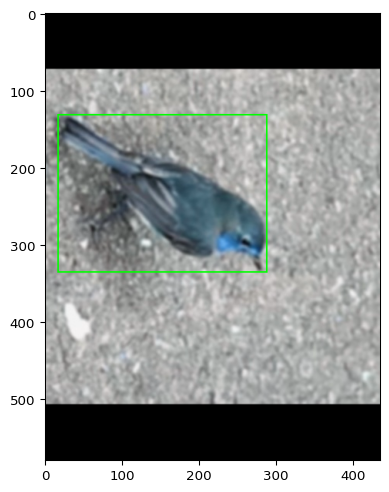

In [48]:
ia.imshow(image_before)

Now that we know that our images and bounding boxes have been augumented successfully, we can copy the contents of this 'New Image' folder to the images folder in our main directory so that we can start creating partitions and TF records to start training.